<a href="https://colab.research.google.com/github/Seema1004/Assignment/blob/main/Project_Step_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip
!pip uninstall -y numpy scikit-learn coremltools
!pip install numpy==1.23.5
!pip install scikit-learn==1.2.2
!pip install coremltools==6.3



 #import the missing functions

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: coremltools 6.3.0
Uninstalling coremltools-6.3.0:
  Successfully uninstalled coremltools-6.3.0
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.16 requires scikit-learn, which is not installed.
mlflow 3.1.0 requires scikit-learn<2, which is not installed.
yellowbrick 1.5 requires scikit-learn>=1.0.0, which is not installed.
sklearn-pandas 2.2.0 requires scikit-learn>=0.23.0, which is not in

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
^C


In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.io import arff

from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
df_clean = pd.read_csv("AirTravelSatisfaction_EnrichedDigital_Rated.csv")

In [6]:
df_clean.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'InflightWifiService', 'ArrivalDelay', 'Frequent Flyer Miles',
       'Travel Purpose Detail', 'Wifi_Usage_Level', 'satisfaction',
       'Mobile_Checkin_Rating', 'Kiosk_Usage_Rating', 'Entertainment_Rating',
       'Wifi_Rating'],
      dtype='object')

In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4999 non-null   int64  
 1   Gender                             4999 non-null   object 
 2   Customer Type                      4999 non-null   object 
 3   Age                                4999 non-null   int64  
 4   Type of Travel                     4999 non-null   object 
 5   Class                              4999 non-null   object 
 6   Flight Distance                    4999 non-null   int64  
 7   Inflight wifi service              4999 non-null   int64  
 8   Departure/Arrival time convenient  4999 non-null   int64  
 9   Ease of Online booking             4750 non-null   float64
 10  Gate location                      4999 non-null   int64  
 11  Food and drink                     4999 non-null   int64

In [3]:
df_clean.columns = df_clean.columns.str.replace(' ', '_')

**DATA PREPARATION**

In [4]:
# # Basic preprocessing
#df['Experience'] = df['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')


In [5]:
#connverting gender to a ecoded value - MALE - 0 , FEMALE - 1

df_clean['Gender_encoded'] = df_clean['Gender'].map({'MALE': 0, 'FEMALE': 1})


In [9]:
df_clean.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'InflightWifiService', 'ArrivalDelay', 'Frequent_Flyer_Miles',
       'Travel_Purpose_Detail', 'Wifi_Usage_Level', 'satisfaction',
       'Mobile_Checkin_Rating', 'Kiosk_Usage_Rating', 'Entertainment_Rating',
       'Wifi_Rating', 'Gender_encoded'],
      dtype='object')

In [6]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,249


In [7]:
df_clean['Experience'] = df_clean['satisfaction'].apply(lambda x: 'Satisfied' if x == 'satisfied' else 'Not Satisfied')

In [8]:
df_clean.columns


Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'InflightWifiService', 'ArrivalDelay', 'Frequent_Flyer_Miles',
       'Travel_Purpose_Detail', 'Wifi_Usage_Level', 'satisfaction',
       'Mobile_Checkin_Rating', 'Kiosk_Usage_Rating', 'Entertainment_Rating',
       'Wifi_Rating', 'Gender_encoded', 'Experience'],
      dtype='object')

In [9]:
#start with filling missing values - median for numerical column and mode for categorical column

df_clean['Ease_of_Online_booking'] = df_clean['Ease_of_Online_booking'].fillna(df_clean['Ease_of_Online_booking'].median())


In [10]:
df_clean['Cleanliness'] = df_clean['Cleanliness'].fillna(df_clean['Cleanliness'].median())

In [11]:
df_clean['Leg_room_service'] = df_clean['Leg_room_service'].fillna(df_clean['Leg_room_service'].median())
df_clean['Baggage_handling'] = df_clean['Baggage_handling'].fillna(df_clean['Baggage_handling'].median())

In [12]:
# 1. Handle missing numeric columns using median
df_clean['Arrival_Delay_in_Minutes'] = df_clean['Arrival_Delay_in_Minutes'].fillna(
    df_clean['Arrival_Delay_in_Minutes'].median())

df_clean['Frequent_Flyer_Miles'] = df_clean['Frequent_Flyer_Miles'].fillna(
    df_clean['Frequent_Flyer_Miles'].median())

# 2. Handle missing categorical columns using mode
df_clean['Travel_Purpose_Detail'] = df_clean['Travel_Purpose_Detail'].fillna(
    df_clean['Travel_Purpose_Detail'].mode()[0])

In [13]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0


In [14]:
df_clean['Wifi_Usage_Level'] = df_clean['Wifi_Usage_Level'].fillna(
    df_clean['Wifi_Usage_Level'].mode()[0])

In [15]:
#normalize numerical columns - These columns have wide range of values hence need
#to normalize them for algorithms to not be distorted. The values range between 0-1 for these columns
from sklearn.preprocessing import MinMaxScaler

# Columns to normalize
cols_to_normalize = [
    'Departure_Delay_in_Minutes',
    'Arrival_Delay_in_Minutes',
    'Frequent_Flyer_Miles'
]

scaler = MinMaxScaler()
df_clean[cols_to_normalize] = scaler.fit_transform(df_clean[cols_to_normalize])

# Preview result
df_clean[cols_to_normalize].head()

,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Frequent_Flyer_Miles
0,0.012115,0.031250,0.315878
1,0.000000,0.009766,0.017029
2,0.000000,0.000000,0.763362
3,0.005553,0.015625,0.894907
4,0.000000,0.000000,0.225613


In [20]:
df_clean.isnull().sum()

,0
id,0
Gender,0
Customer_Type,0
Age,0
Type_of_Travel,0
Class,0
Flight_Distance,0
Inflight_wifi_service,0
Departure/Arrival_time_convenient,0
Ease_of_Online_booking,0


In [ ]:
df_clean

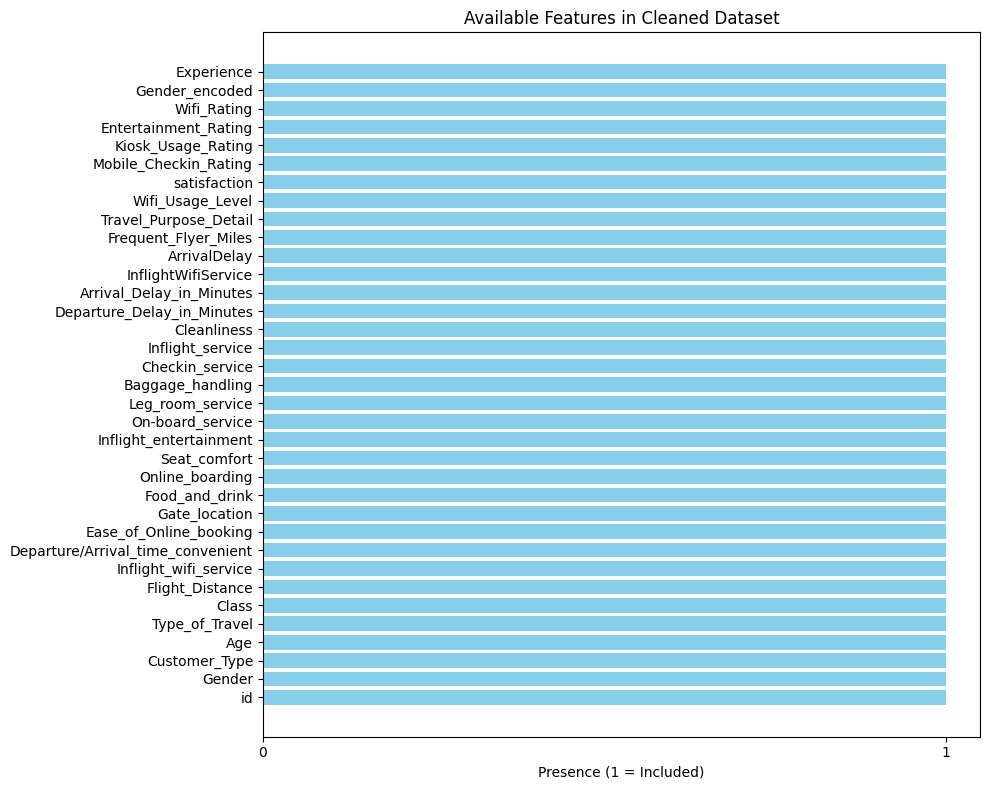

In [21]:
# Get the list of column names
columns = df_clean.columns.tolist()

# Create dummy counts (all 1s) just to plot the column names
counts = [1] * len(columns)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(columns, counts, color='skyblue')
plt.title("Available Features in Cleaned Dataset")
plt.xlabel("Presence (1 = Included)")
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

**Feature Engineering**

In [22]:
#here creating new columns based on the data set
#1.Sum of all customer-rated service features (e.g., Wi-Fi, seat comfort, food).
#Ranges vary depending on how many components were scored.
#Helps the model understand overall customer experience.

service_cols = [
    'Seat comfort',
    'Food and drink',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Cleanliness', 'Inflight service', 'InflightWifiService'
]
df_clean['Service_Total'] = df_clean[service_cols].sum(axis=1)

KeyError: "['Seat comfort', 'Food and drink', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Inflight service'] not in index"

In [ ]:
df_clean.info()

In [ ]:
#3.create a simple flag to decide if the flight is delayed or not
df_clean['IsDelayed'] = df_clean['Departure Delay in Minutes'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

**DATA MODELING**

In [16]:
# The idea is to use 6 different models and check which one suits better for the dataset

#1. Logistic Regression

#this needs more cleanup -

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [17]:
label_encoder = LabelEncoder()

df_clean['Customer_Type'] = label_encoder.fit_transform(df_clean['Customer_Type'])

df_clean['Type_of_Travel'] = label_encoder.fit_transform(df_clean['Type_of_Travel'])

df_clean['Class'] = label_encoder.fit_transform(df_clean['Class'])

df_clean['Travel_Purpose_Detail'] = label_encoder.fit_transform(df_clean['Travel_Purpose_Detail'])

df_clean['Baggage handling'] = df_clean['Baggage_handling'].fillna(df_clean['Baggage_handling'].median())

df_clean['Experience'] = label_encoder.fit_transform(df_clean['Experience'])

df_clean['Wifi_Usage_Level'] = label_encoder.fit_transform(df_clean['Wifi_Usage_Level'])

In [27]:
df_clean.to_csv("prepared_air_travel_dataset.csv", index=False)

In [18]:
#model training
X = df_clean.drop(columns = ["id","satisfaction", "Gender", "Experience"], axis=1)
y = df_clean['Experience']

#normalize the numeric columns
numeric_cols = X.select_dtypes(include='number').columns
df_clean[numeric_cols].describe()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Check for NaNs in X_train before training
print("Checking for NaNs in X_train before training:")
print(X_train.isnull().sum().sort_values(ascending=False).head())


Checking for NaNs in X_train before training:
Customer_Type           0
Age                     0
Gender_encoded          0
Wifi_Rating             0
Entertainment_Rating    0
dtype: int64


In [20]:
X_train.columns

Index(['Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance',
       'Inflight_wifi_service', 'Departure/Arrival_time_convenient',
       'Ease_of_Online_booking', 'Gate_location', 'Food_and_drink',
       'Online_boarding', 'Seat_comfort', 'Inflight_entertainment',
       'On-board_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Inflight_service', 'Cleanliness',
       'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'InflightWifiService', 'ArrivalDelay', 'Frequent_Flyer_Miles',
       'Travel_Purpose_Detail', 'Wifi_Usage_Level', 'Mobile_Checkin_Rating',
       'Kiosk_Usage_Rating', 'Entertainment_Rating', 'Wifi_Rating',
       'Gender_encoded', 'Baggage handling'],
      dtype='object')

In [ ]:
X_train.isnull().sum()

In [24]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize and Train the Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Step 2: Make Predictions
y_pred = logreg.predict(X_test)

# Step 3: Evaluate the Model
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Satisfied', 'Satisfied']))
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred):.4f}")

🔍 Confusion Matrix:
[[675 123]
 [230 472]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.75      0.85      0.79       798
    Satisfied       0.79      0.67      0.73       702

     accuracy                           0.76      1500
    macro avg       0.77      0.76      0.76      1500
 weighted avg       0.77      0.76      0.76      1500


✅ Accuracy Score: 0.7647

✅ Recall Score: 0.6724

✅ Precision Score: 0.7933

✅ F1 Score: 0.7278


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


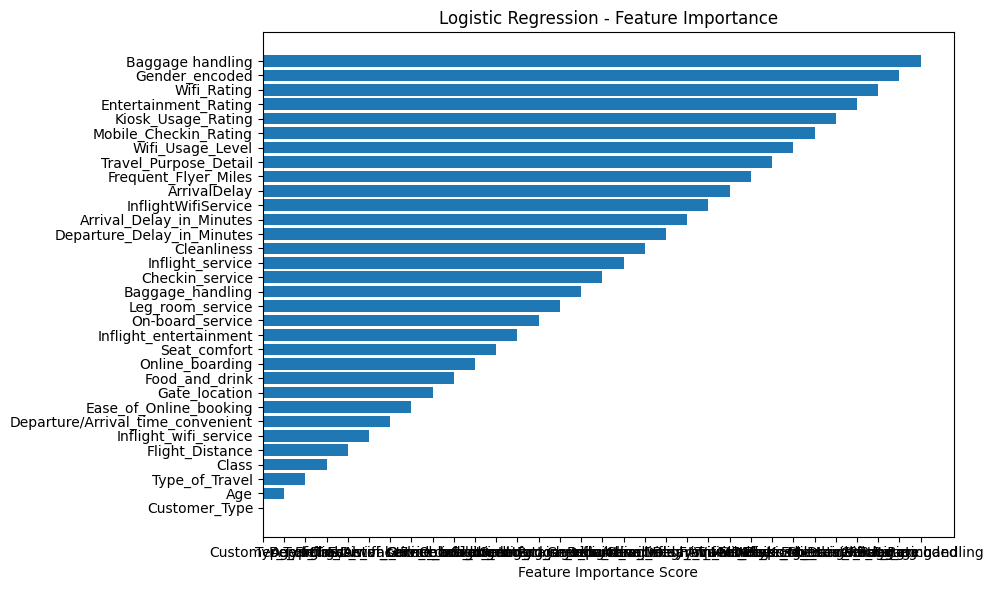

In [28]:
feature_importance = logreg.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Logistic Regression - Feature Importance")
plt.tight_layout()
plt.show()

Overall, the model is 79% accurate. - With more inclination to detect if the customer is dissatisfied.


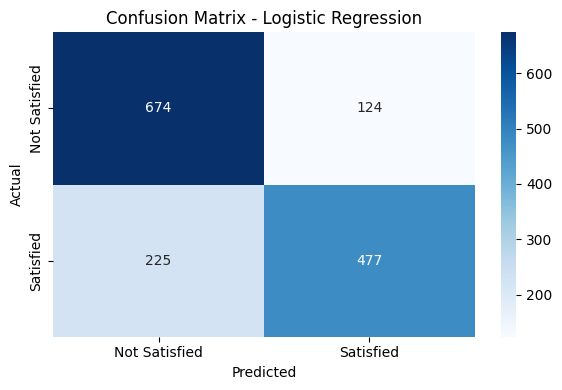

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Satisfied', 'Satisfied']

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

In [30]:
#2. KNN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [32]:
# You can start with k=11 (default) or experiment
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [33]:
y_pred_knn = knn.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_knn):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_knn):.4f}")

🔍 Confusion Matrix:
[[659 139]
 [440 262]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.60      0.83      0.69       798
    Satisfied       0.65      0.37      0.48       702

     accuracy                           0.61      1500
    macro avg       0.63      0.60      0.58      1500
 weighted avg       0.62      0.61      0.59      1500


✅ Accuracy Score: 0.6140

✅ Accuracy Score: 0.6140

✅ Recall Score: 0.3732

✅ Precision Score: 0.6534

✅ F1 Score: 0.4751


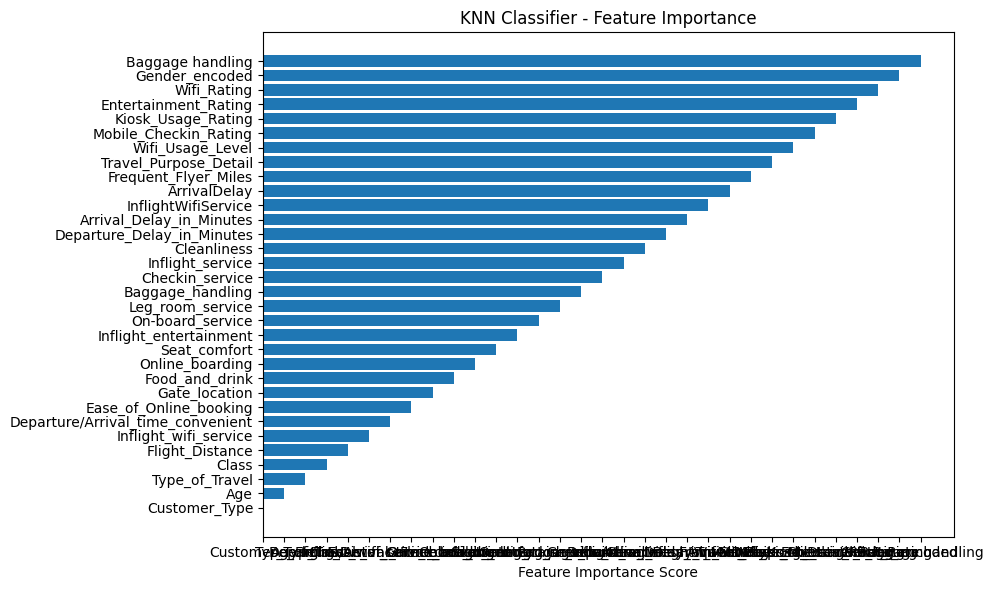

In [34]:
feature_importance = knn.feature_names_in_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("KNN Classifier - Feature Importance")
plt.tight_layout()
plt.show()

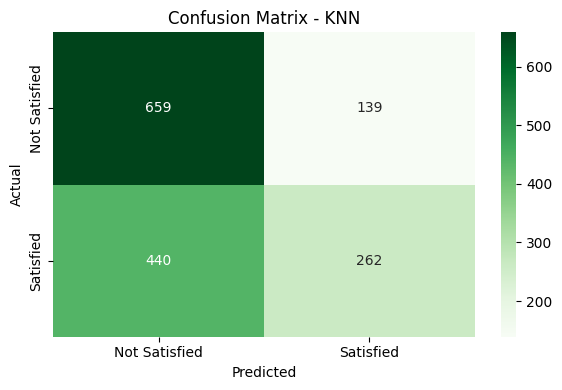

In [35]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
labels = ['Not Satisfied', 'Satisfied']

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [36]:
#3. Use the decision tree model

from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
y_pred_dt = dtree.predict(X_test)

# Evaluation
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Not Satisfied', 'Satisfied']))

print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Accuracy Score: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Recall Score: {recall_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ Precision Score: {precision_score(y_test, y_pred_dt):.4f}")
print(f"\n✅ F1 Score: {f1_score(y_test, y_pred_dt):.4f}")


🔍 Confusion Matrix:
[[620 178]
 [216 486]]

📊 Classification Report:
               precision    recall  f1-score   support

Not Satisfied       0.74      0.78      0.76       798
    Satisfied       0.73      0.69      0.71       702

     accuracy                           0.74      1500
    macro avg       0.74      0.73      0.74      1500
 weighted avg       0.74      0.74      0.74      1500


✅ Accuracy Score: 0.7373

✅ Accuracy Score: 0.7373

✅ Recall Score: 0.6923

✅ Precision Score: 0.7319

✅ F1 Score: 0.7116


In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(dtree, max_depth=3, feature_names=X.columns, class_names=['Not Satisfied', 'Satisfied'], filled=True)
plt.title("Decision Tree (First 2 Levels)")
plt.show()

In [ ]:
feature_importance = dtree.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Decision Tree- Feature Importance")
plt.tight_layout()
plt.show()

In [21]:
#4. Random Forest Classifier

# Train Random Forest Model
clf = RandomForestClassifier(n_jobs=-1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [22]:
# Evaluate Model
y_pred = clf.predict(X_test)
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(conf_matrix)

Predicted    0    1
Actual             
0          730   68
1          158  544


In [23]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0,)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
 [[730  68]
 [158 544]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87       798
           1       0.89      0.77      0.83       702

    accuracy                           0.85      1500
   macro avg       0.86      0.84      0.85      1500
weighted avg       0.85      0.85      0.85      1500

Accuracy: 0.85
Precision: 0.89
Recall: 0.77
F1-Score: 0.83


In [ ]:
# Get feature importances
importances = clf.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
#Inspect using AUTO AI

In [ ]:
# Uninstall existing xgboost and pandas to ensure a clean install
!pip uninstall -y xgboost pandas

# Install a recent, compatible version of xgboost
# Using a version that should be compatible with recent pandas versions
!pip install xgboost==1.7.6

!pip install pandas==1.5.3

Found existing installation: xgboost 1.4.2
Uninstalling xgboost-1.4.2:
  Successfully uninstalled xgboost-1.4.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 24.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lazypredict 0.2.16 requires pandas, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 89.1 MB/s eta 0:00:00
ERROR: Operation cancelled by user
^C


In [28]:
from xgboost import XGBClassifier

In [29]:
xgBmodel = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # use_label_encoder=False to suppress warning
xgBmodel.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [30]:
y_pred = xgBmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.83
Confusion Matrix:
 [[705  93]
 [162 540]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       798
           1       0.85      0.77      0.81       702

    accuracy                           0.83      1500
   macro avg       0.83      0.83      0.83      1500
weighted avg       0.83      0.83      0.83      1500

Accuracy: 0.85
Precision: 0.85
Recall: 0.77
F1-Score: 0.81


In [ ]:
# Get feature importances
importances = xgBmodel.feature_importances_
features = X.columns

# Combine into DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - XGB Classifier')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:

#scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LazyPredict model benchmarking
autoAI = LazyClassifier(verbose=0, ignore_warnings=True)
models, predictions = autoAI.fit(X_train, X_test, y_train, y_test)

# Show model performance
print(models)

In [31]:
from sklearn.ensemble import GradientBoostingClassifier


In [32]:
# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [33]:
y_pred = gb_model.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8413333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       798
           1       0.87      0.77      0.82       702

    accuracy                           0.84      1500
   macro avg       0.85      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500


Confusion Matrix:
 [[720  78]
 [160 542]]


In [34]:
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.85
Precision: 0.87
Recall: 0.77
F1-Score: 0.82


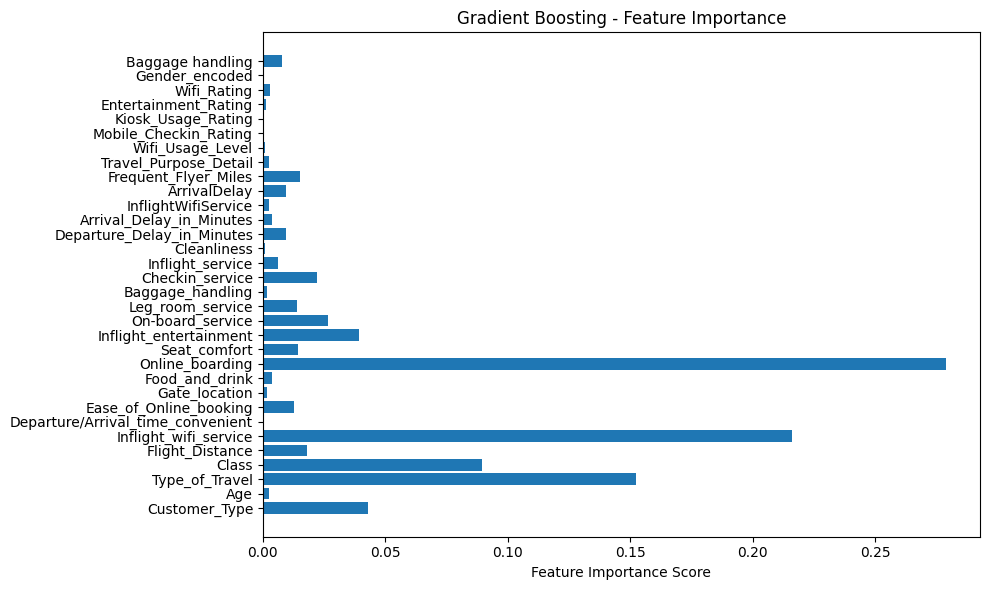

In [36]:
feature_importance = gb_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.title("Gradient Boosting - Feature Importance")
plt.tight_layout()
plt.show()

In [24]:
import joblib

# Save the trained model (choose the one you want, here is Random Forest example)
joblib.dump(clf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [25]:
!pip install coremltools==6.3

  Using cached coremltools-6.3.0-py3-none-any.whl


In [26]:
import coremltools
import joblib

# Load the model
model = joblib.load("random_forest_model.pkl")

# Use a sample of your training data to define input shape
sample_input = X_train.iloc[0:1]  # Assuming X_train exists

# Convert to Core ML model
mlmodel = coremltools.converters.sklearn.convert(clf)


# Save the .mlmodel file
coreml_model.save("AirTravelSatisfactionClassifier.mlmodel")

NameError: name '_tree' is not defined